#     **Predicting Medical Insurance Cost for an Insurance Company** <br>
<img src="images/instheme.png" width="850" height="500">

### **Overview** 
Insurance companies invests a lot of time, effort, and money in creating models that accurately predicts health care costs.
The data consists of age, sex, BMI(body mass index), children, smoker and region which are independent features and charge as a dependent feature. <br>
The purposes of this project is to look into different features to observe their relationship to predict individual medical costs billed by health insurance.<br>
The dataset used is from Kaggle.


Following the **CRISP-DM** framework for working through this data problem.

## Business Understanding

#### Business Objectives
The goal of this project is to build a Machine Learning model that can predict medical expenses for customers for an Insurance company and provide insights into the major factors that contribute to higher insurance costs.

This project could be boiled down to the following research question:

* **What contributes to a higher insurance cost?**
#### Business Success Criteria
The success criteria is the model's accuracy, measured by lower values of metrics like Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE) and this achieve:
* **Improved pricing**: The model should enable the company to set more accurate and competitive premiums.
* **Enhanced Risk Assessment**: The model should provide clear insights into what factors are the most significant drivers of cost.

## Data Understanding

The dataset contains 2772 rows and 7 columns.
#### **Data Description:**
The columns of this dataset are:<br>

**Target variable to be predicted**:   Charges

**Insurance Features**:
1. Age
2. Sex
3. BMI (Body Mass Index)
4. Children
5. Smoker
6. Region



### **Exploratory Data Analysis (EDA)**
Here we explore the data to identify data quality issues and gain initial insights. Performing Exploratory Data Analysis (EDA), using summary statistics and data visualizations to uncover patterns and relationships.

In [2125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier


from sklearn.compose import ColumnTransformer
from datetime import date

from sklearn import set_config

set_config(display="diagram")

In [2126]:
import warnings
warnings.filterwarnings('ignore')

#### Cleaning the Data

Loading the data

In [2129]:
data = pd.read_csv('data/medical_insurance.csv')

In [2130]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Investigating the dataset for missing or problematic data.

In [2132]:
data.shape

(2772, 7)

The provided dataset contains 2772 entries and 7 features.

Checking for Duplicate entries.

In [2135]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  1435


Dropping the duplicate entries.

In [2137]:
data = data.drop_duplicates()

In [2138]:
data.shape

(1337, 7)

Below is the concise summary of the dataframe

In [2140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Desciptive statistics of the data is given below:

In [2142]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Checking for missing values

In [2144]:
#returns the total number of missing values per column
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null or NaN or missing values in the data.

#### Analysing the data

##### **Univariate Analysis**

Below Histograms show the distribution of individual numerical features.

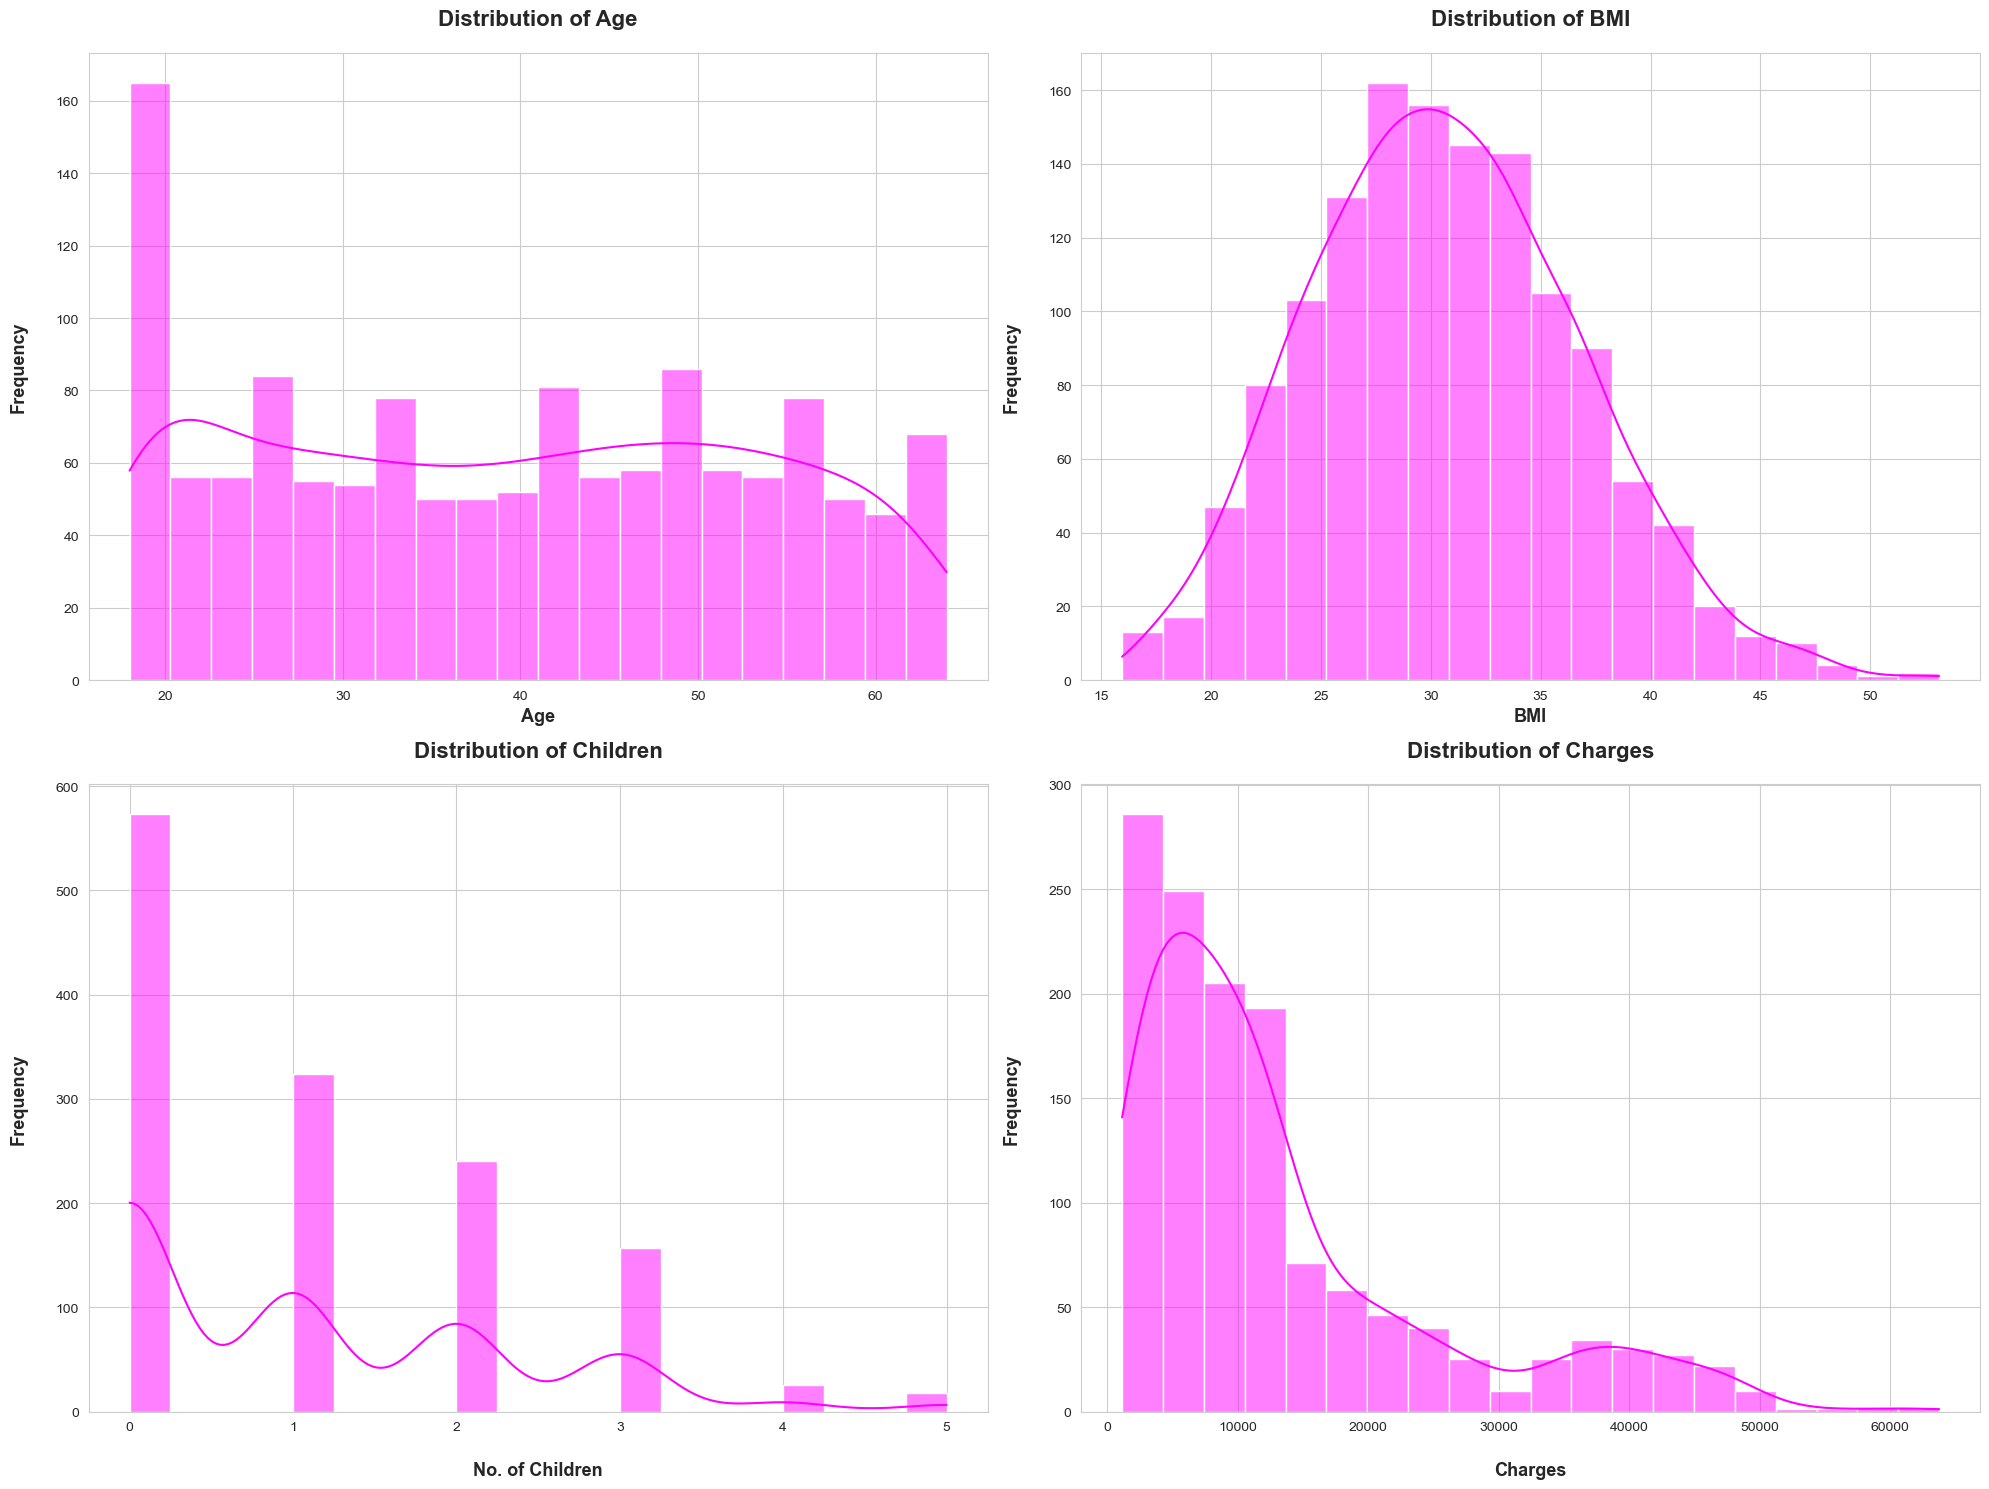

In [2149]:
# Distribution of Numerical Features
#['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2,2, figsize=(20, 15))

sns.histplot(data=data['age'], bins=20, kde=True, color='magenta', ax=axes[0][0])
axes[0][0].set_xlabel('Age', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[0][0].set_title('Distribution of Age', pad=20, fontsize=16, fontweight='bold')
axes[0][0].grid(True)

sns.histplot(data=data['bmi'], bins=20, kde=True, color='magenta', ax=axes[0][1])
axes[0][1].set_xlabel('BMI', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[0][1].set_title('Distribution of BMI', pad=20, fontsize=16, fontweight='bold')
axes[0][1].grid(True)

sns.histplot(data=data['children'], bins=20, kde=True, color='magenta', ax=axes[1][0])
axes[1][0].set_xlabel('No. of Children', labelpad=20, fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[1][0].set_title('Distribution of Children', pad=20, fontsize=16, fontweight='bold')
axes[1][0].grid(True)

sns.histplot(data=data['charges'], bins=20, kde=True, color='magenta', ax=axes[1][1])
axes[1][1].set_xlabel('Charges', labelpad=20, fontsize=13, fontweight='bold')
axes[1][1].set_ylabel('Frequency', labelpad=20, fontsize=13, fontweight='bold')
axes[1][1].set_title('Distribution of Charges', pad=20, fontsize=16, fontweight='bold')
axes[1][1].grid(True)
plt.tight_layout()
plt.show()

**Findings:**

1. **Age**: The distribution of age is quite varied.The average age of policy holders is 39 years. The data shows a wide range from a minimum of 18 to a maximum of 64 years.

2. **BMI**: The average BMI is around 30.6, which falls into the obese range (30.0 or higher) according to the WHO. The values range from 15.96 to 53.1
3. **Children**: The number of children per policyholder ranges from 0 to 5. The average number of children is 1 and a significant portion of the population has few to no children.

4. **Charges**: The average charges is 13,279.12. The standard deviation is very high, at 12,110.35 suggesting a large spread in costs. The minimum charge is 1,121.87 and the maximum is $63,770.42


The above plots show that **BMI** and **Charges** data contains outliers.

A violin plot & box plot of the **BMI** and **Charges** below clearly shows the outliers in the higher BMI and Charges range.

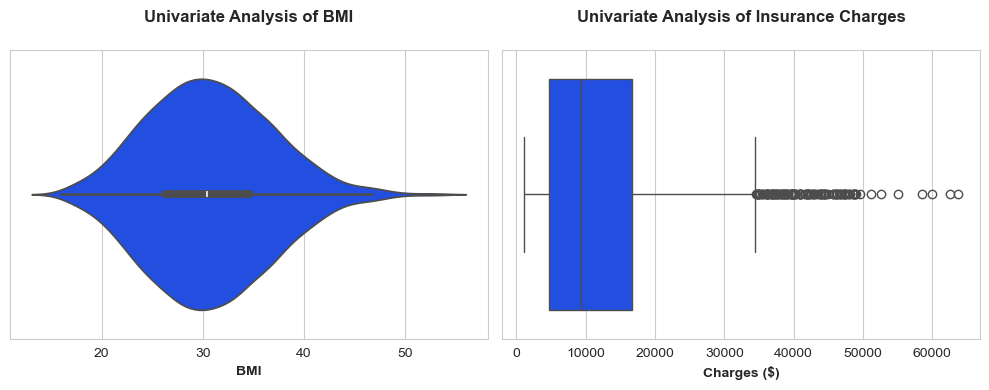

In [2153]:
#subplots for the categorical bivariate plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.set_style("whitegrid")
sns.violinplot(data= data, x='bmi', ax=axes[0], palette='bright')
axes[0].set_title('Univariate Analysis of BMI',pad=20, fontweight='bold', fontsize=12)
axes[0].set_xlabel('BMI', fontsize=10, fontweight='bold')


sns.boxplot(data=data, x='charges', ax=axes[1],palette='bright')
axes[1].set_title('Univariate Analysis of Insurance Charges',pad=20, fontweight='bold', fontsize=12)
axes[1].set_xlabel('Charges ($)', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Findings**:
1. From the Box plots above, its clear that `charges` has many outliers. These are all values that are greater than the upper bound of 34,472.84. The minimum charge outlier is 34,472.84, and the maximum is $63,770.43.
2. `bmi` has also some outliers that are greater than the upper bound of 46.75. The minimum BMI outlier is 46.75 and the maximum is 53.13

**IQR (Inter Quartile Range)**

Applying IQR on the `charges` column in order to handle its outliers.

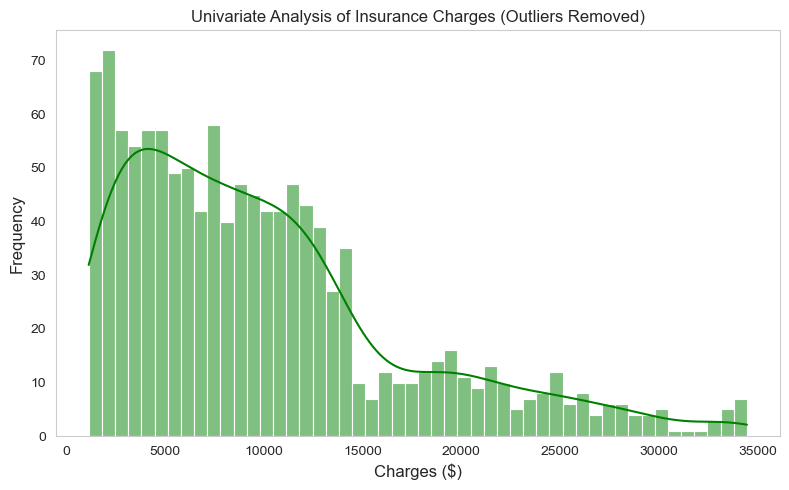

In [2157]:
# Filter out 0 charges as they are not representative
data_filtered = data[data['charges'] > 0]

# Calculate Q1, Q3, and IQR for outlier removal
Q1 = data_filtered['charges'].quantile(0.25)
Q3 = data_filtered['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data_filtered[(data_filtered['charges'] >= lower_limit) & (data_filtered['charges'] <= upper_limit)]

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_no_outliers['charges'], kde=True, bins=50, color='green')
plt.title('Univariate Analysis of Insurance Charges (Outliers Removed)', fontsize=12)
plt.xlabel('Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.tight_layout()

Applying IQR on the `bmi` column in order to handle its outliers.

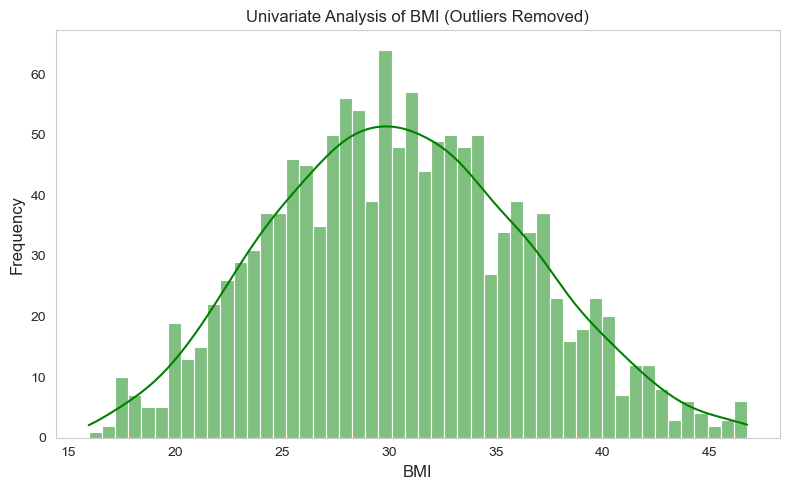

In [2159]:
# Filter out 0 bmi as they are not representative
data_filtered = data[data['bmi'] > 0]

# Calculate Q1, Q3, and IQR for outlier removal
Q1 = data_filtered['bmi'].quantile(0.25)
Q3 = data_filtered['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data_filtered[(data_filtered['bmi'] >= lower_limit) & (data_filtered['bmi'] <= upper_limit)]

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_no_outliers['bmi'], kde=True, bins=50, color='green')
plt.title('Univariate Analysis of BMI (Outliers Removed)', fontsize=12)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.tight_layout()

Shown below is the descriptive statistics of the data after cleaning up.

In [2161]:
data_no_outliers.describe()

,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


In [2162]:
data = data_no_outliers

Below Countplots show the distribution of individual categorical features `sex`, `smoker` and `region`

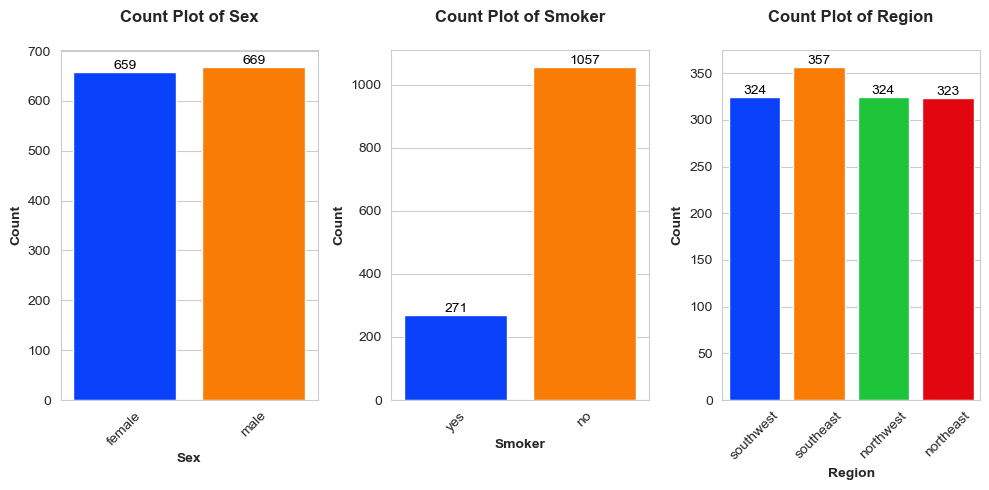

In [2164]:
# Define a list of manageable categorical columns for count plots
manageable_categorical_columns = ['sex', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.ravel()

# Loop through each categorical column
for i, column in enumerate(manageable_categorical_columns):
    sns.countplot(x=data[column], data=data, palette='bright', ax=axes[i], saturation=0.95)

    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)

    axes[i].set_title(f'Count Plot of {column.capitalize()}', pad=20, fontweight='bold')
    axes[i].set_xlabel(column.capitalize(),fontweight='bold')
    axes[i].set_ylabel('Count',fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and save plots
plt.tight_layout()
plt.savefig('categorical_count_plots.png')

**Findings**:<br>
1. **Sex**: The number of males and females is almost balanced, with 675 males and 662 females.
2. **Smoker**: The majority of the individuals are non-smokers (1063), while there are 274 smokers.
3. **Region**: The data is around evenly distributed across the four regions, with the southeast having the highest count at 364 individuals, followed by the southwest (325), northwest (324), and northeast (324).

**Actionable Insights from Univariate Analysis:**<br>
1. **Charges**: The insurance company should focus on risk management for high-cost individuals. Since a small portion of the policyholders accounts for a disproportionately large share of the total medical costs, developing targeted programs for those groups could significantly reduce overall payout.
2. **Age**: The age distribution of policyholders is fairly even. So the compoany's marketing strategies must be appealing to all age groups.
3. **BMI**: The average BMI is approximately 30, which falls into the obese category. The data also has outliers with extremely high BMI values.
        This indicates a potential public health concern within the customer base. The insurance company could introduce wellness programs           or rewards to encourage healthy habits among policyholders.
4. **Smoker**: Around 20% of policyholders are smokers which could lead them to serious health issues. The company could design policies with higher premiums for smokers to accurately reflect their higher risk profile. Additionally, offering smoking cessation programs could be a strong value-add for customers.
5. **Region**: The customer base is fairly evenly distributed across the four geographical regions. There's no single dominant region. The company can develop region-specific strategies,for example, a region with a higher average BMI might be targeted with specific wellness programs.
6. **Children**: The majority of policyholders do not have children, while a smaller portion has one or two children. The maximum number of children is five. The company can develop personalized product recommendations based on a policyholder's family structure.
7. **Sex**: There is a nearly equal distribution of male and female policyholders, with males making up slightly more of the total population
            There could be some strategies developed if there is any difference in average charges among males and females.



##### **Bivariate Analysis:**

Here we will explore relationships between `charges` and other independant variables and identify the possible predictors of insurance costs.

Below scatter plots show the relationships of **numercial features** `age`, `bmi`, and `children` with `charges`

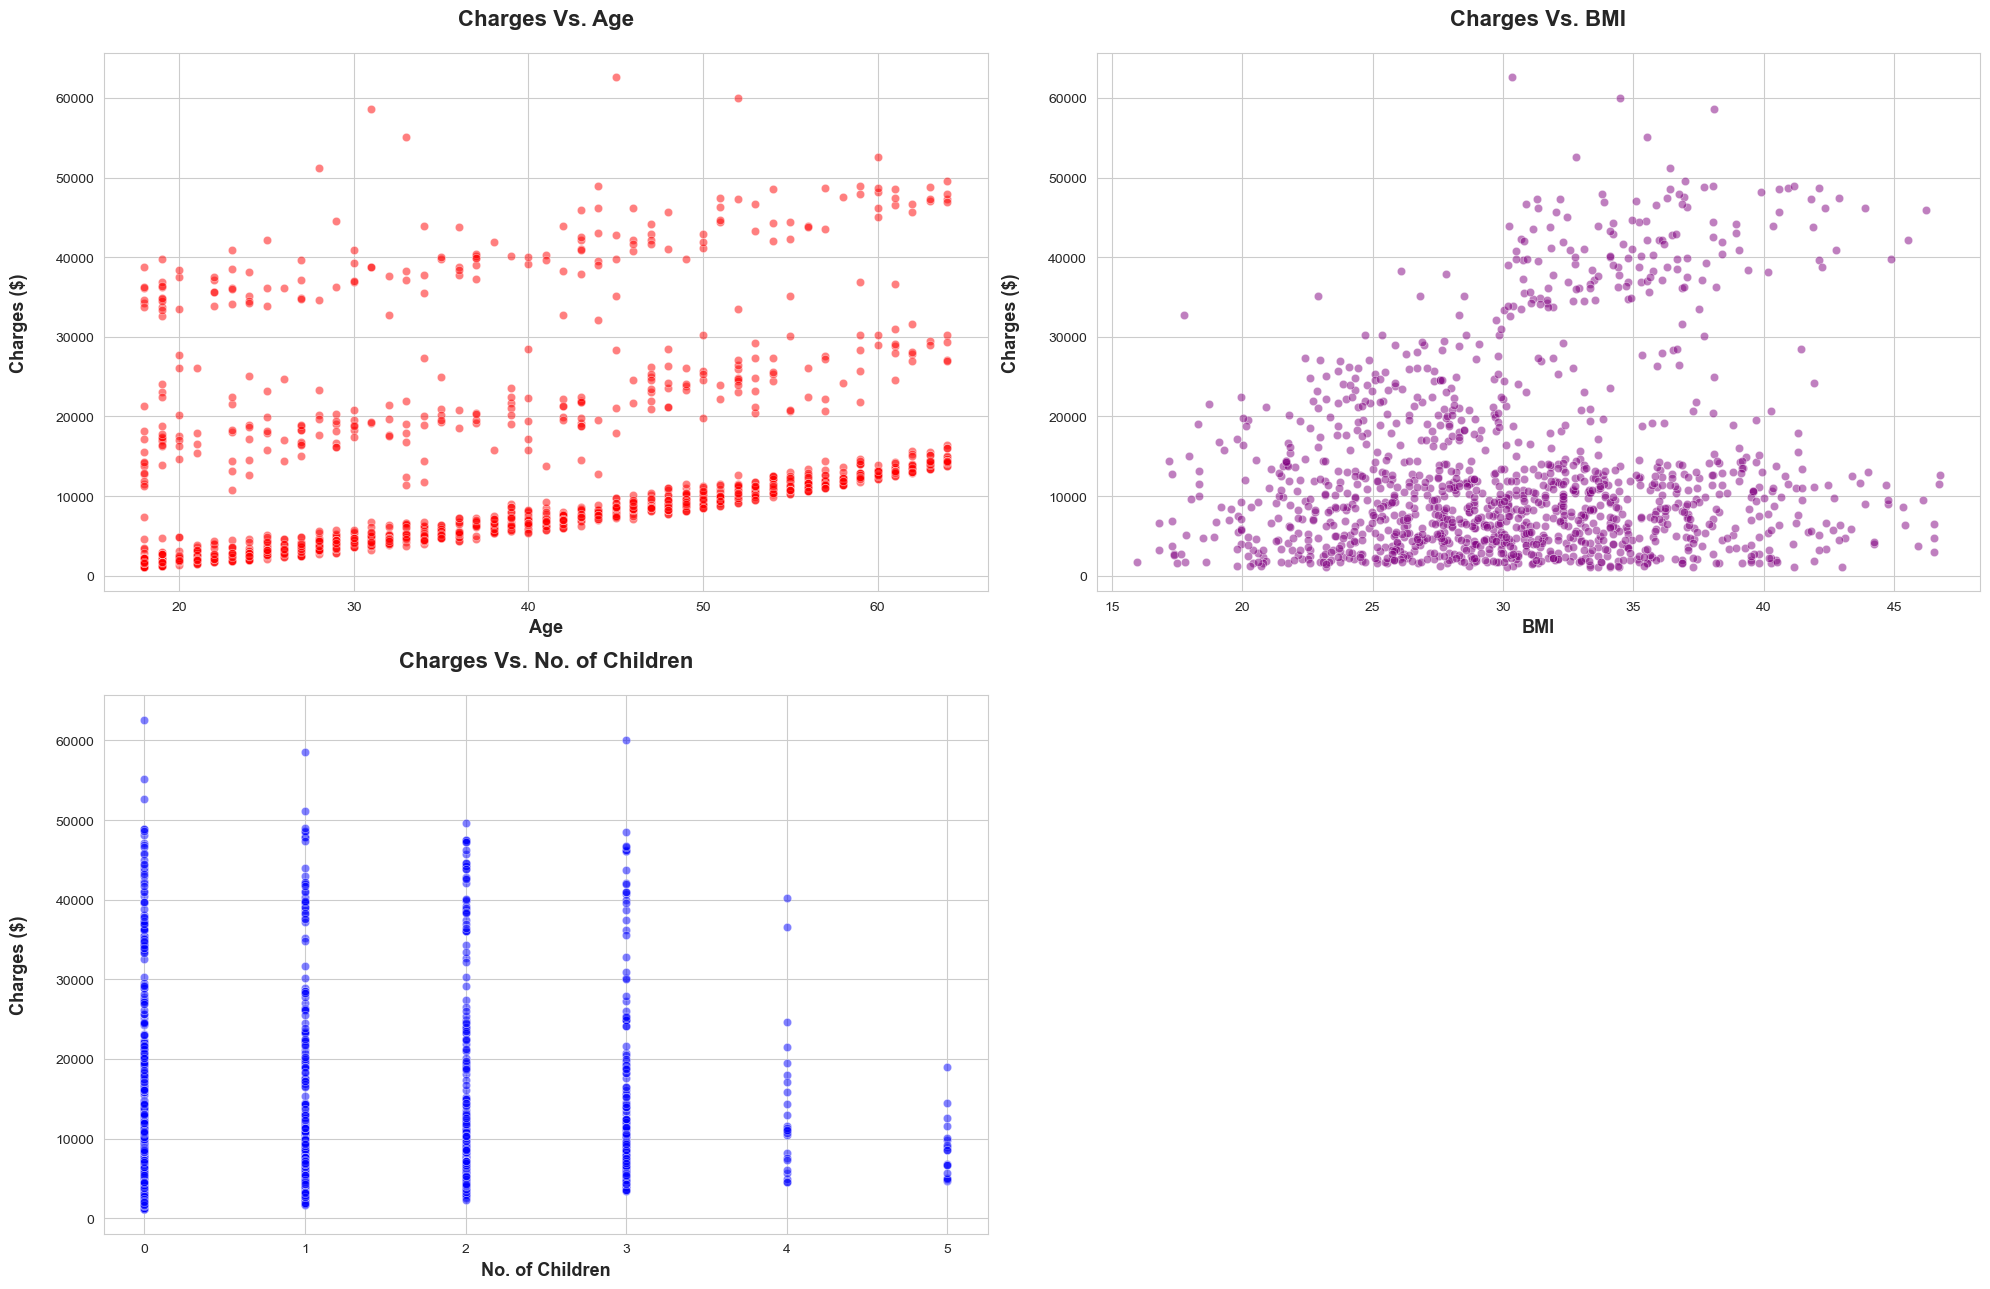

In [2170]:
#subplots for the numercial scatter plots
fig, axes = plt.subplots(2, 2, figsize=(20, 13))
sns.set_style("whitegrid")
sns.scatterplot(x='age', y='charges', data=data_no_outliers, ax=axes[0][0], alpha=0.5, color='red')
axes[0][0].set_title('Charges Vs. Age',pad=20, fontweight='bold', fontsize=16)
axes[0][0].set_xlabel('Age', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.scatterplot(x='bmi', y='charges', data=data_no_outliers, ax=axes[0][1], alpha=0.5, color='purple')
axes[0][1].set_title('Charges Vs. BMI',pad=20, fontweight='bold', fontsize=16)
axes[0][1].set_xlabel('BMI', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.scatterplot(x='children', y='charges', data=data_no_outliers, ax=axes[1][0], alpha=0.5, color='blue')
axes[1][0].set_title('Charges Vs. No. of Children',pad=20, fontweight='bold', fontsize=16)
axes[1][0].set_xlabel('No. of Children', fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

**Findings:** <br>
1. **Charges vs. Age**: There is a clear positive correlation between age and charges. As people get older, their medical costs tend to increase.The data points appear to be grouped into distinct bands, which may suggest that other factors are having a significant impact at different age groups.
2. **Charges Vs. BMI**: There appears to be a positive correlation between BMI and charges. Individuals with higher BMI values tend to have higher charges.
3. **Charges Vs. No. of Children**: The plot shows that there is no strong relationship between the number of children and the charges. The data points are widely scattered across the plot. There is no clear trend indicating that an increase in the number of children leads to a consistent increase in medical costs.


Below is the correlation map of all the numerical features with `charges`

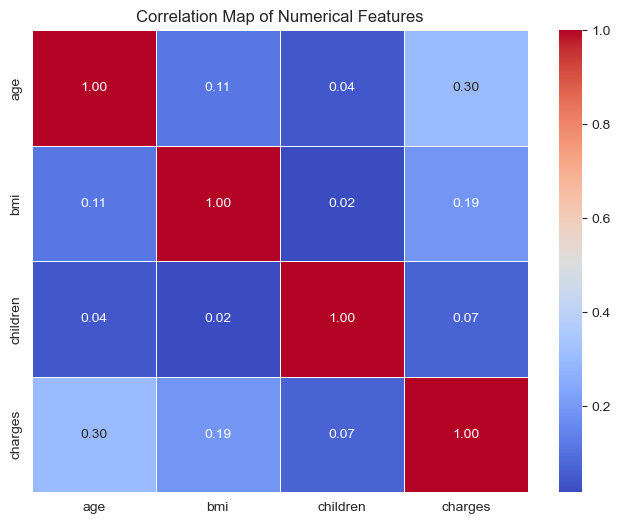

In [2173]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map of Numerical Features')
plt.show()

**Findings:**<br>
1. **Age and Charges**: The heatmap shows a positive correlation of 0.30 between age and charges. This is expected, as medical costs tend to rise with age.
2. **BMI and Charges**: There is also a positive correlation of 0.19 between bmi and charges, indicating that higher BMI is generally associated with higher medical charges.
3. **Children and Charges**: The correlation between children and charges is very weak, with a value of 0.07. This suggests that the number of children is not a strong predictor of medical charges.
4. **Age and BMI**: The relationship between age and bmi is very weak, with a correlation of 0.11. This indicates that a person's age is not a good predictor of their BMI.


Below bivariate plots show the relationship of Categorical features with the Charges.

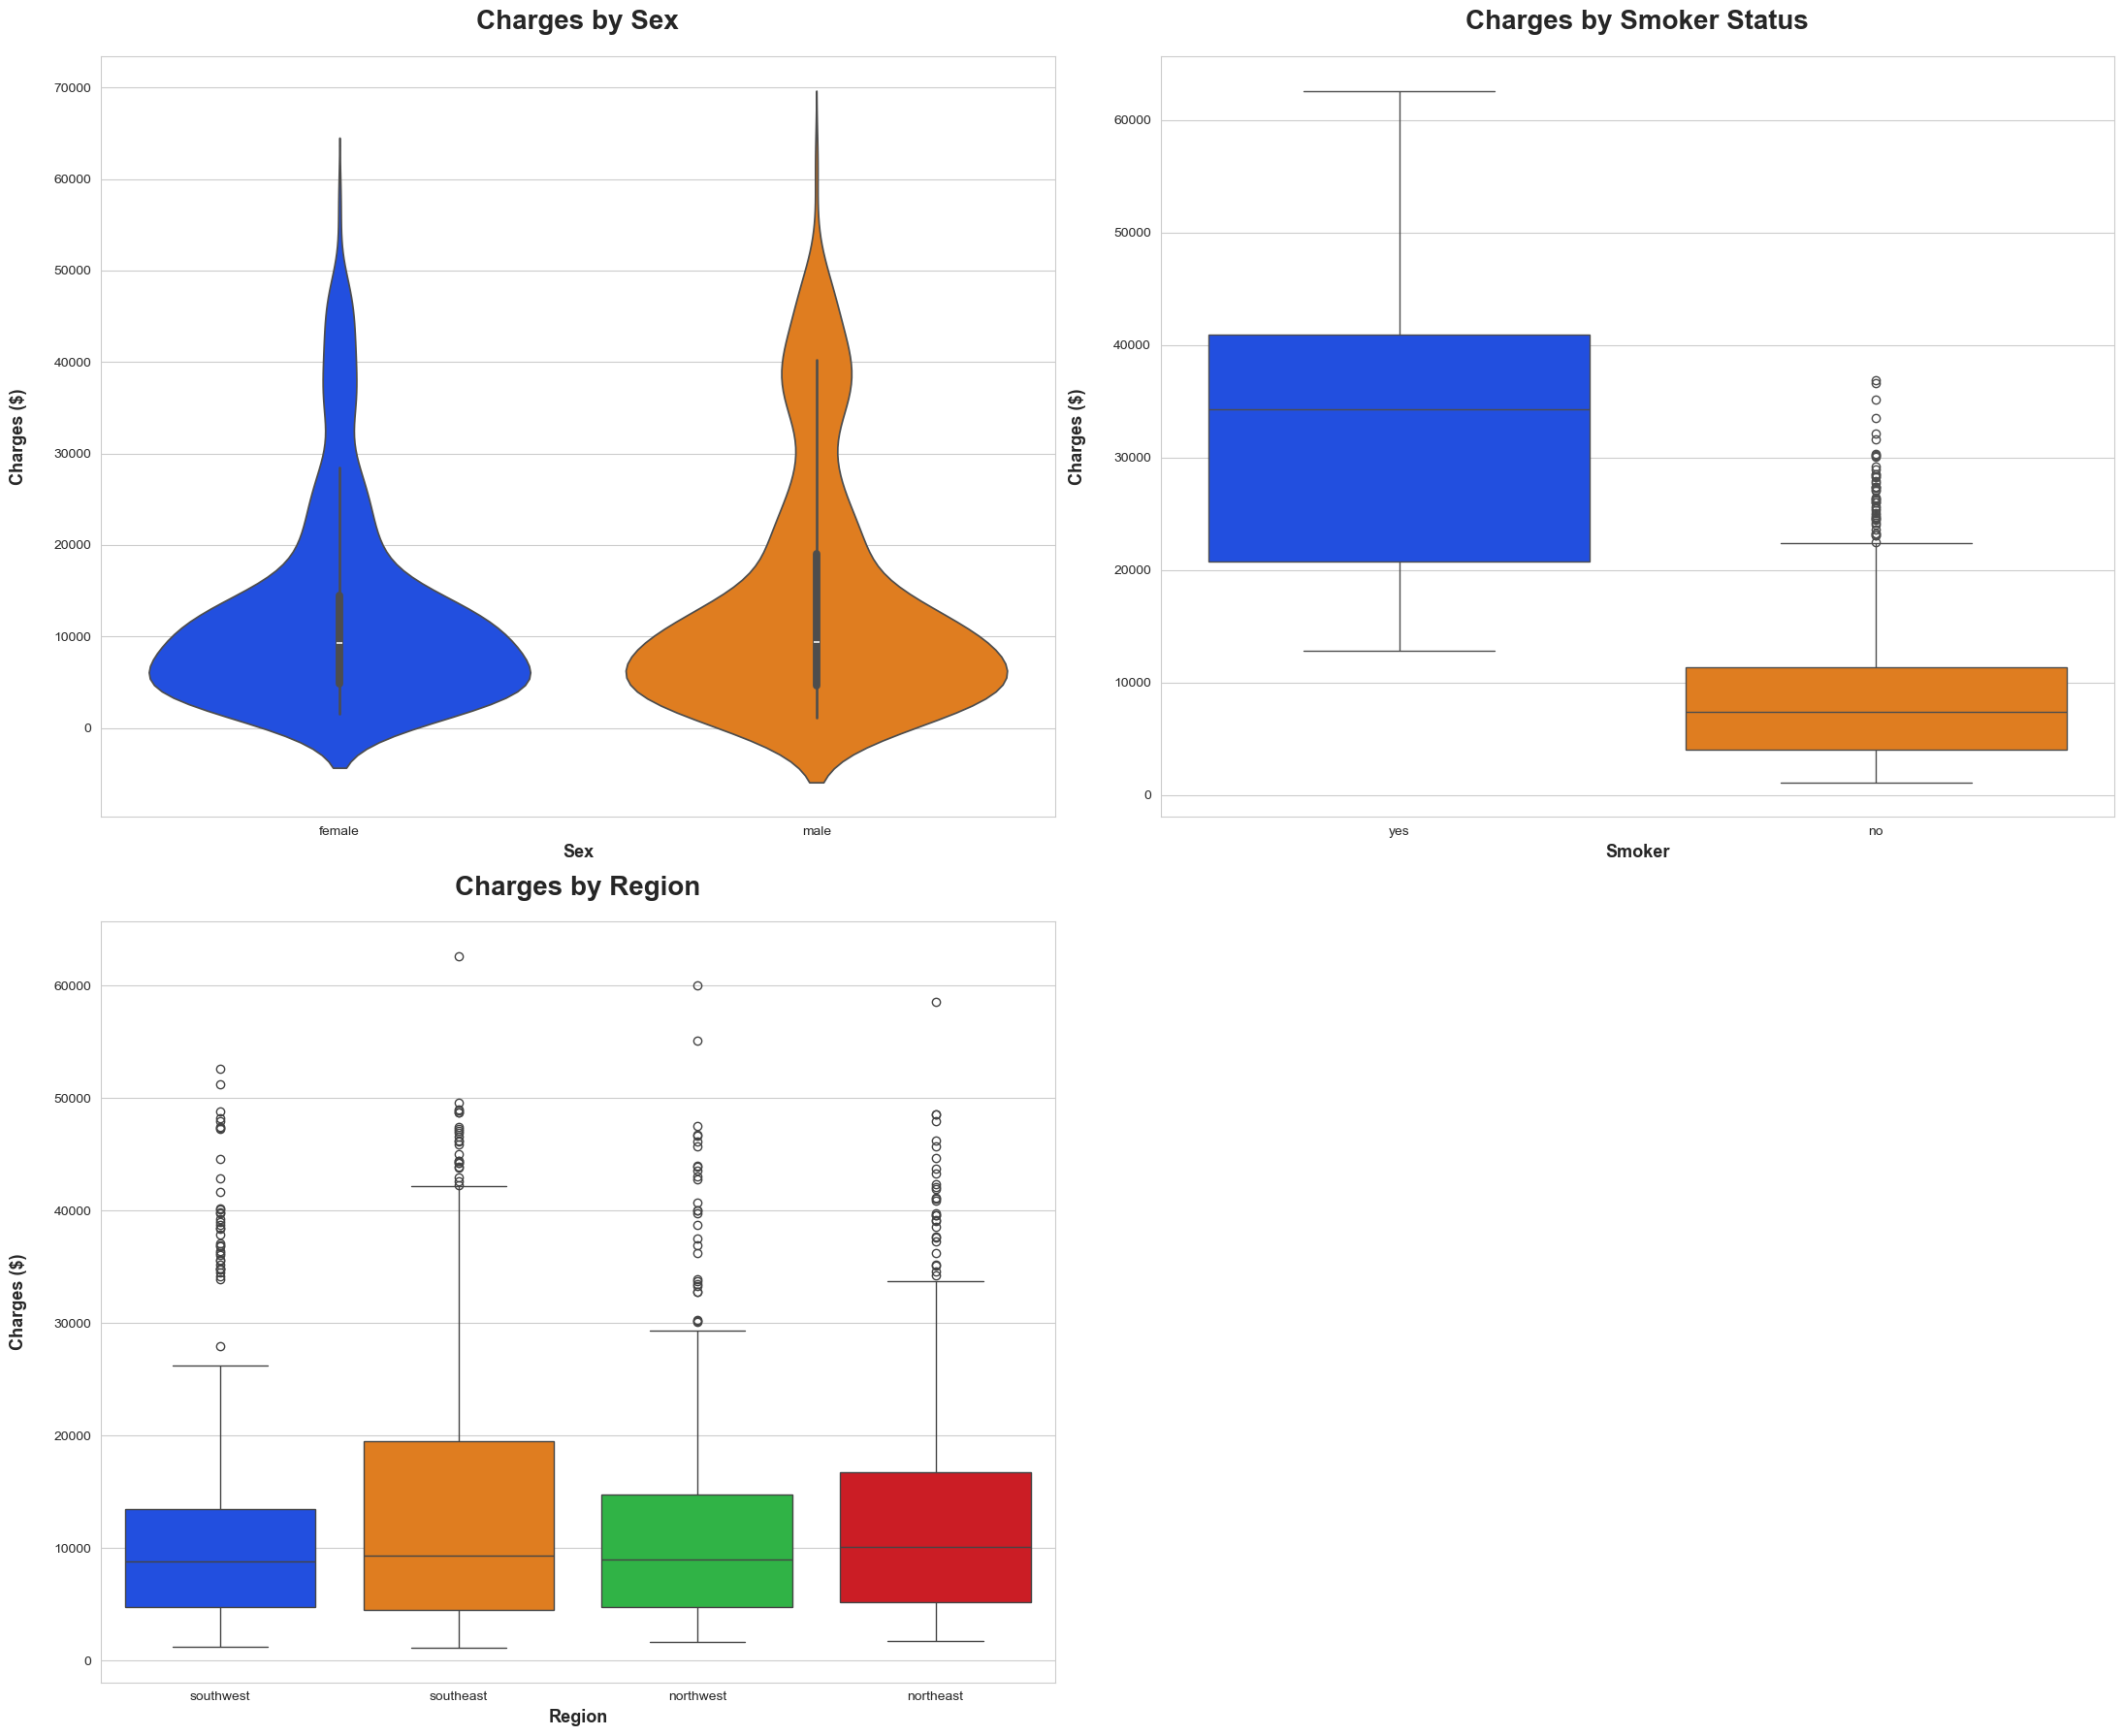

In [2176]:
#subplots for the categorical bivariate plots
fig, axes = plt.subplots(2, 2, figsize=(22, 18))
sns.set_style("whitegrid")
sns.violinplot(x='sex', y='charges', data=data_no_outliers, ax=axes[0][0], palette='bright')
axes[0][0].set_title('Charges by Sex',pad=20, fontweight='bold', fontsize=20)
axes[0][0].set_xlabel('Sex', fontsize=13, fontweight='bold')
axes[0][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.boxplot(x='smoker', y='charges', data=data_no_outliers, ax=axes[0][1], palette='bright')
axes[0][1].set_title('Charges by Smoker Status',pad=20, fontweight='bold', fontsize=20)
axes[0][1].set_xlabel('Smoker', fontsize=13, fontweight='bold')
axes[0][1].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

sns.boxplot(x='region', y='charges', data=data_no_outliers, ax=axes[1][0], palette='bright')
axes[1][0].set_title('Charges by Region',pad=20, fontweight='bold', fontsize=20)
axes[1][0].set_xlabel('Region', fontsize=13, fontweight='bold')
axes[1][0].set_ylabel('Charges ($)', labelpad=20, fontsize=13, fontweight='bold')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

**Findings:**<br>
1. **Charges by Sex**: Both genders have a wide range of charges and a number of outliers, particularly on the higher end, indicating that while charges are generally similar, some individuals face significantly higher costs.
2. **Charges by Smoker Status**: The median charges for smokers are substantially higher than for non-smokers. The range of charges for smokers is  much wider, with many high-value outliers. This suggests that smoking status is a major driver of charges.
3. **Charges by Region**: The plot shows that charges are relatively similar across all four regions. The southeast region has a slightly higher median and more outliers on the high end compared to the other regions.

**Actionable Insights from Bivariate Analysis:**<br>
1. **Impact of Smoker status on Charges**: Smoking status is a primary driver of their insurance costs. Insurance company could develop targeted wellness programs to encourage smoking cessation. Offering premium discounts or other rewards for non-smokers could also be a strategy to manage costs and promote healthier lifestyles among policyholders. This could lead to a potentially lower future claims.
2. **The Minimal Impact of Sex and Region**: There is no significant difference in medical charges between genders or across regions, these factors are not strong predictors of charges. So the insurance company could focus of other factors primarily.

## Data Preparation

#### **Column selection:**

From the Bivariate analysis above, certain columns were found irrelevant which shown no significant impact on the insurance charges. Those columns are `children`, `sex` and `region`. These features can be dropped from the cleaned dataset.

In [2182]:
data_final = data.drop(['children', 'sex', 'region'], axis=1)

In [2183]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1328 non-null   int64  
 1   bmi      1328 non-null   float64
 2   smoker   1328 non-null   object 
 3   charges  1328 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 84.2+ KB


#### **Train/Test split:**

Splitting the data into train and test data before further data preprocessing in order to prevent data leakage.

In [2186]:
X=data_final.drop('charges', axis=1)
y=data_final['charges']

In [2187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Categorical Data Handling:**

**One-Hot Encoding**

Performing One-Hot Encoding to the categorical column `smoker`

In [2191]:
# Identify the categorical column to be encoded
smoker_column = ['smoker']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data ONLY and transform both training and testing sets
X_train_encoded = ohe.fit_transform(X_train[smoker_column])
X_test_encoded = ohe.transform(X_test[smoker_column])

# Get the feature names for the new columns
smoker_feature_names = ohe.get_feature_names_out(smoker_column)

# Convert the encoded arrays back into DataFrames
X_train_smoker_df = pd.DataFrame(X_train_encoded, columns=smoker_feature_names, index=X_train.index)
X_test_smoker_df = pd.DataFrame(X_test_encoded, columns=smoker_feature_names, index=X_test.index)

# Drop the original 'smoker' column
X_train_final = X_train.drop(smoker_column, axis=1)
X_test_final = X_test.drop(smoker_column, axis=1)

# Concatenate the new encoded columns with the rest of the features
X_train_final = pd.concat([X_train_final, X_train_smoker_df], axis=1)
X_test_final = pd.concat([X_test_final, X_test_smoker_df], axis=1)

X_train = X_train_final
X_test = X_test_final

#### **Feature Engineering:**

Exploring if new informative columns can be created from the existing columns which can be important in deciding the insurance charges and improve the performance of the model.

**1. BMI Categories** <br>
It can be more useful to categorize BMI into groups that reflect health status, which can be a better predictor for insurance costs.

In [2195]:
# function to categorize BMI based on WHO standards
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to the 'bmi' column in both the training and testing sets
X_train['bmi_category'] = X_train['bmi'].apply(get_bmi_category)
X_test['bmi_category'] = X_test['bmi'].apply(get_bmi_category)

**2. Age Groups**<br>
Age has been identified as a crucial factor, but its relationship with charges might not be linear. Creating age groups can help the model capture non-linear patterns.Divide the age feature into age groups (e.g., 18-29, 30-39, 40-49, 50-59, 60+). This can reveal that charges increase more sharply at certain life stages.

In [2197]:
# Define the bins and labels for age groups
bins = [17, 29, 39, 49, 59, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Create the new 'age_group' column for both sets
X_train['age_group'] = pd.cut(X_train['age'], bins=bins, labels=labels, right=True)
X_test['age_group'] = pd.cut(X_test['age'], bins=bins, labels=labels, right=True)

**3. Age-Smoker factor**<br>
Create a new feature `age_smoker` as the product of age and the one-hot encoded smoker_yes column. It would help the model learn if the effect of age on charges is different for smokers versus non-smokers.

In [2199]:
# Create the interaction feature for both the training and testing sets
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
X_train['age_smoker'] = X_train['age'] * X_train['smoker_yes']
X_test['age_smoker'] = X_test['age'] * X_test['smoker_yes']

**4. BMI-Smoker factor** <br>
Create a new feature `bmi_smoker` that combines bmi and smoker status. The simple multiplication of a one-hot encoded smoker feature and the numerical BMI value can create a feature that helps the model understand the combined effect of high BMI and smoking on charges.

In [2201]:
# Create the interaction feature for both the training and testing sets
# smoker_yes=1 indicates a smoker
# smoker_yes=0 indicates non-smoker
X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']

Encoding the newly created categorical columns `bmi_category` and `age_group` into numerical columns using **One-Hot Encoding**.

In [2203]:
# Identify categorical and numerical columns
categorical_cols = ['bmi_category','age_group']
numerical_cols = ['age', 'bmi', 'smoker_no', 'smoker_yes', 'age_smoker', 'bmi_smoker']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on training data and transform both train and test data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Create DataFrames from the encoded arrays with proper column names
encoded_cols_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols_names, index=X_test.index)

# Drop original categorical columns from X_train and X_test and concatenate with encoded dataframes
X_train_processed = pd.concat([X_train[numerical_cols], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_cols], X_test_encoded_df], axis=1)

X_train = X_train_processed
X_test = X_test_processed

In [2204]:
X_train.head()

,age,bmi,smoker_no,smoker_yes,age_smoker,bmi_smoker,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_18-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
414,19,35.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
171,49,30.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
947,37,34.20,0.0,1.0,37.0,34.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1013,48,32.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
210,20,33.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### **Transformations:**

**1. Polynomial Features:**

We have seen so far that the relationship of the input features `age` and `bmi` which are string predictors, with the target variable `charges` is not a simple straight line.

**Age**: The increase in insurance costs might accelerate as a person gets older, so a feature like age^2 could be useful. <br>
**BMI**: Moving from an overweight to an obese BMI category could lead to a disproportionately larger jump in costs than a move from a normal weight to overweight, which can be captured by a feature like BMI^2
 

Applying quadratic transformations to `age` and `bmi` using **PolynomialFeatures**

In [2209]:
# Identify numerical columns for polynomial features
poly_features_cols = ['age', 'bmi']

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the numerical columns for both training and testing sets
X_train_poly = poly.fit_transform(X_train[poly_features_cols])
X_test_poly = poly.transform(X_test[poly_features_cols])

# Get the feature names for the new polynomial columns
poly_feature_names = poly.get_feature_names_out(poly_features_cols)

# Create dataframes from the polynomial feature arrays
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train.index)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test.index)

# Drop original polynomial feature columns from X_train and X_test and concatenate the new polynomial features
X_train_processed = pd.concat([X_train_poly_df, X_train.drop(poly_features_cols, axis=1)], axis=1)
X_test_processed = pd.concat([X_test_poly_df, X_test.drop(poly_features_cols, axis=1)], axis=1)

X_train = X_train_processed
X_test = X_test_processed

In [2210]:
X_train.head()

,age,bmi,age^2,age bmi,bmi^2,smoker_no,smoker_yes,age_smoker,bmi_smoker,bmi_category_Normal,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_18-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
414,19.0,35.15,361.0,667.85,1235.5225,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
171,49.0,30.30,2401.0,1484.70,918.0900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
947,37.0,34.20,1369.0,1265.40,1169.6400,0.0,1.0,37.0,34.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1013,48.0,32.30,2304.0,1550.40,1043.2900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
210,20.0,33.00,400.0,660.00,1089.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2211]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062 entries, 414 to 1135
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1062 non-null   float64
 1   bmi                       1062 non-null   float64
 2   age^2                     1062 non-null   float64
 3   age bmi                   1062 non-null   float64
 4   bmi^2                     1062 non-null   float64
 5   smoker_no                 1062 non-null   float64
 6   smoker_yes                1062 non-null   float64
 7   age_smoker                1062 non-null   float64
 8   bmi_smoker                1062 non-null   float64
 9   bmi_category_Normal       1062 non-null   float64
 10  bmi_category_Obese        1062 non-null   float64
 11  bmi_category_Overweight   1062 non-null   float64
 12  bmi_category_Underweight  1062 non-null   float64
 13  age_group_18-29           1062 non-null   float64
 14  age_group_3

Now we have the preprocessed final train and test datasets which are ready for building a model.

## Modeling

Exploring some of the Baseline models to find the appropriate ML model for the dataset.

In [2215]:
# Build and evaluate models using cross-validation
reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression" : Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boost Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
}

cv_results = {}
# 5-fold Cross validation on the training data after Scaling
for name, model in reg_models.items():
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('regressor', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    cv_results[name] = {
        'Mean RMSE': rmse_scores.mean(),
        'Std Dev RMSE': rmse_scores.std()
    }

print("Cross-Validation results (Mean RMSE and Standard Deviation) of Training Data:\n")
for name, res in cv_results.items():
    print(f"Model: {name}")
    print(f"  Mean RMSE: {res['Mean RMSE']:.2f}")
    print(f"  Standard Deviation RMSE: {res['Std Dev RMSE']:.2f}\n")

#Find the best model
# Find the best model based on the mean RMSE from cross-validation
best_model_name = min(cv_results, key=lambda k: cv_results[k]['Mean RMSE'])
best_model_regressor = reg_models[best_model_name]

# Create and train the final pipeline with the best model
final_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                 ('regressor', best_model_regressor)])
# Fit the best model on the training data and evaluate on the test set
final_pipeline.fit(X_train, y_train)

# Make predictions on the unseen test data
y_pred = final_pipeline.predict(X_test)

# Calculate RMSE on the test set
test_rmse = root_mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
print("------------------------------------------------------------")
print(f"Best Model: {best_model_name}")
print(f"Test RMSE with the best model (Gradient Boosting Regressor): {test_rmse:.2f}")
print(f"Test MAE with the best model (Gradient Boosting Regressor): {test_mae:.2f}")
print("------------------------------------------------------------")

Cross-Validation results (Mean RMSE and Standard Deviation) of Training Data:

Model: Linear Regression
  Mean RMSE: 4858.41
  Standard Deviation RMSE: 701.79

Model: Ridge Regression
  Mean RMSE: 4853.32
  Standard Deviation RMSE: 705.44

Model: Lasso Regression
  Mean RMSE: 4853.82
  Standard Deviation RMSE: 705.25

Model: Random Forest Regressor
  Mean RMSE: 5156.03
  Standard Deviation RMSE: 572.34

Model: Gradient Boost Regressor
  Mean RMSE: 4739.15
  Standard Deviation RMSE: 570.30

------------------------------------------------------------
Best Model: Gradient Boost Regressor
Test RMSE with the best model (Gradient Boosting Regressor): 4491.06
Test MAE with the best model (Gradient Boosting Regressor): 2409.77
------------------------------------------------------------


## Evaluation

We have used two main metrics to evaluate our best model: Mean Absolute Error (**MAE**) and Root Mean Squared Error (**RMSE**). 

#### **Interpreting the Cross-Validation Results** <br>
The cross-validation results from the training data give a preliminary look at how each model is performing and how consistently it performs across different subsets of the data.

**Linear Models(Linear, Ridge(L2) & Lasso(L1)):** Linear Regression has a mean **RMSE** of around **4,858** and a **Standard deviation** of about **702**. Ridge & Lasso Regression which are the regularized versions of Linear Regression, have same mean **RMSE** of around **4,854** and a **Standard deviation** of about **705** which are closely similar to that of **Linear Regression**. Their consistent performance suggests they're all capturing the same basic linear relationships in the data.

**Random Forest Regressor**: This model's mean **RMSE** of **5,156** is a bit higher than the linear models. However, its **Standard deviation** is significantly lower at **572**. This indicates that while its average performance wasn't the absolute best during training, it was more consistent and stable across different data splits.

**Gradient Boosting Regressor**: This is the clear **winner** in the cross-validation phase. Its mean **RMSE** of **$4,739.15** is the lowest of all models. It also has a low **Standard deviation** of **570.30**, which suggests it is both the most accurate and the most stable model on the training data.

#### **Interpreting the Final Test Results** <br>
The test results are the most important part because they show how the **best-performing model (Gradient Boosting)** performs on completely unseen data.

**Test RMSE**: $4,491.06

* This is the final measure of the model's prediction accuracy. It tells that the typical error of the model's predictions is about $4,491.

* This value is lower than the mean cross-validation RMSE ($4,738.95). It suggests that the **model generalized well** and is **not overfitted** to the training data.

**Test MAE**: $2,409.77

* It tells that, on average, the Gradient Boosting model's predictions are off by approximately $2,410.

#### **Significance of the evaluation metrics (RMSE and MAE) used:** <br>

**MAE (Mean Absolute Error)**: This metric tells the average absolute difference between the model's predictions and the actual values. For example, here the model's MAE is 2,410, it means that, on average, the model's predictions are off by $2,410. It's a very straightforward and interpretable metric. <br>

**RMSE (Root Mean Squared Error)**: This is similar to MAE, but it gives more weight to larger errors. By squaring the errors before averaging them, RMSE penalizes big mistakes more heavily. This makes it a good metric to use when large errors are particularly undesirable. When RMSE is significantly higher than MAE, it suggests that the model is making a few very large, costly errors, but here its not!

#### **Conclusion** <br>
**Best Model : Gradient Boosting Regressor** <br>
* Gradient Boosting Regressor consistently outperformed the other models during cross-validation and demonstrated strong performance on the final, unseen test set. The MAE of about $2,410 is a very good result for predicting a value as complex and varied as insurance charges.
* A test RMSE of 4,491.06 and a test MAE of 2,409.77 are both very strong indicators of a high-performing model. It demonstrates that our chosen model, the Gradient Boosting Regressor, is both accurate on average and robust enough to handle the complexity and variability in the data.

